# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *AnisotropicDiffusion*
Remove noise and keep edges by anisotropic diffusion filtering
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF

# Math and iteration
from  math import exp, pow
from timeit import itertools

### Parameters:
    kernelSize = Size of the kernel
    numIterations = Number of iterations
    k = Rate of the conduction coefficient
    lamda = Amount of smoothing 
    imageName = Input image name

In [2]:
kernelSize = 3
numIterations = 10
k = 10.0
lamda = 0.5
imageName = "Giraffe.png"

### Read and show input image

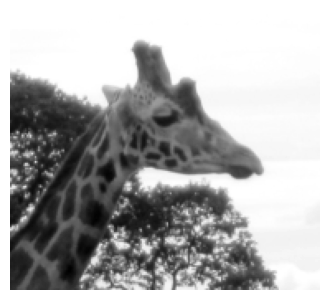

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create image to store the result


In [4]:
outputImage = createImageF(width, height)

### Filter

In [5]:
# Create images to store the iteration
image = createImageF(width, height)

# Apply filter
kernelCentre = int((kernelSize - 1) / 2)
for x,y in itertools.product(range(0, width), range(0, height)):
    outputImage[y, x] = inputImage[y, x]

for iteration in range(0, numIterations):
    for x,y in itertools.product(range(0, width), range(0, height)):
        image[y, x] = outputImage[y, x]
    
    for x,y in itertools.product(range(0, width), range(0, height)):
        sumWeights = 0;
        outputImage[y, x] = 0
        
        centrePixleValue = image[y, x]
        for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
            posY, posX = y + wy - kernelCentre, x + wx - kernelCentre 
  
            if posY > -1 and posY <  height and  posX > -1 and posX <  width: 
                # Weight according to gradient     
                weight = exp(-pow((image[posY, posX]-centrePixleValue)/k, 2) ); 
                
                # Use lambda to weight the pixel value
                if posY != y and posX != x:
                    weight *= lamda
                    
                sumWeights += weight
                outputImage[y, x] += weight * float(image[posY, posX])              
        # Normalize
        if sumWeights > 0:
            outputImage[y, x] /= sumWeights
            

### Show output image

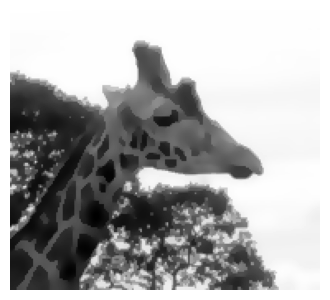

In [6]:
plotImageF(outputImage, figureSize = 4)